## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from collections import Counter
from scipy.spatial import distance
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn import cluster, metrics, datasets
import seaborn as sns 
# importing more models that I may need.


# For 3D plots
import plotly
plotly.tools.set_credentials_file(username='lawrencefsoto', api_key='Sg9BCjSVRVWL5jklUegz')


import plotly.plotly as py
import plotly.graph_objs as go

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 700) # want to see more rows and columns

## Reading My Data

In [5]:
df = pd.read_csv('../Scraping/clean_season_17_18')
df.shape

(372, 44)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 44 columns):
Name    372 non-null object
2P      372 non-null float64
2P%     372 non-null float64
2PA     372 non-null float64
3P      372 non-null float64
3P%     372 non-null float64
3PA     372 non-null float64
AST     372 non-null float64
Age     372 non-null int64
BLK     372 non-null float64
DRB     372 non-null float64
DRtg    372 non-null int64
FG      372 non-null float64
FG%     372 non-null float64
FGA     372 non-null float64
FT      372 non-null float64
FT%     372 non-null float64
FTA     372 non-null float64
G       372 non-null int64
GS      372 non-null int64
MP      372 non-null float64
ORB     372 non-null float64
ORtg    372 non-null int64
PF      372 non-null float64
PTS     372 non-null float64
Pos     372 non-null object
STL     372 non-null float64
TOV     372 non-null float64
TRB     372 non-null float64
Tm      372 non-null object
AST%    372 non-null float64
BLK%    3

In [7]:
df.set_index('Name', inplace=True)
df = df[df['G']>=40]
pf = df[df['Pos']=='PF']
pf = pf.reindex(sorted(pf.columns), axis=1)
pf.head()

,2P,2P%,2PA,3P,3P%,3PA,AST,AST%,Age,BLK,BLK%,BPM,DBPM,DRB,DRB%,DRtg,FG,FG%,FGA,FT,FT%,FTA,G,GS,MP,OBPM,ORB,ORB%,ORtg,PER,PF,PTS,Pos,STL,STL%,TOV,TOV%,TRB,TRB%,TS%,Tm,USG%,VORP
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Quincy Acy,1.0,0.384,2.6,3.6,0.349,10.4,2.0,6.0,27,1.0,1.6,-2.2,-0.2,7.8,17.0,110,4.6,0.356,13.0,1.8,0.817,2.1,70,8,1359.0,-2.0,1.4,3.1,99,8.2,5.3,14.7,PF,1.2,1.2,2.1,13.3,9.2,10.0,0.525,BRK,14.4,-0.1
Al-Farouq Aminu,2.5,0.432,5.8,3.0,0.369,8.1,2.0,5.8,27,1.0,1.6,1.1,1.9,10.3,22.3,104,5.5,0.395,14.0,1.4,0.738,1.9,69,67,2072.0,-0.8,2.3,5.2,105,12.0,3.3,15.5,PF,1.9,1.9,1.9,11.3,12.6,13.8,0.522,POR,14.8,1.6
Ryan Anderson,2.2,0.539,4.0,3.7,0.386,9.7,1.7,5.1,29,0.6,1.0,0.2,-0.8,6.8,15.4,109,5.9,0.431,13.7,2.1,0.774,2.7,66,50,1725.0,1.0,2.7,6.2,121,12.6,3.6,17.6,PF,0.7,0.7,1.2,7.5,9.4,10.8,0.592,HOU,14.4,1.0
Giannis Antetokounmpo,12.6,0.554,22.8,0.8,0.307,2.5,6.5,23.7,23,1.9,3.3,5.8,1.9,10.8,25.3,106,13.4,0.529,25.4,8.8,0.760,11.6,75,75,2756.0,3.9,2.8,6.7,116,27.3,4.2,36.4,PF,2.0,2.0,4.0,11.7,13.6,16.0,0.598,MIL,31.2,5.4
Carmelo Anthony,6.0,0.437,13.8,3.4,0.357,9.4,2.0,6.5,33,1.0,1.8,-3.8,-1.9,7.7,17.7,109,9.4,0.404,23.2,2.9,0.767,3.8,78,78,2501.0,-1.9,1.3,2.9,104,12.7,3.9,25.0,PF,0.9,0.9,2.0,7.3,9.0,10.0,0.503,OKC,23.2,-1.1


## Clustering PF w/ Kmeans

In [8]:
X = pf.drop(columns=['G','GS','MP','Age','Pos','Tm']) ## took out columns that don't matter to the model
ss=StandardScaler()
pf_scaled=ss.fit_transform(X)

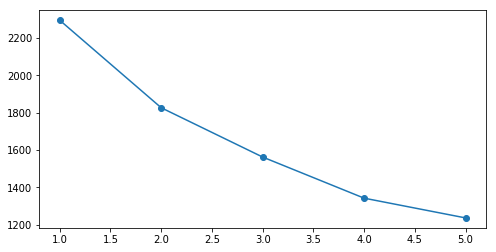

In [9]:
## looking best cluster with inertia for Kmeans first before Modeling out my SF's

cluster_range = range( 1, 6 )
cluster_errors = []

for num_clusters in cluster_range:
    pfclusters = KMeans(num_clusters)
    pfclusters.fit(pf_scaled)
    cluster_errors.append(pfclusters.inertia_)

clusters_df = pd.DataFrame({ "num_clusters":cluster_range, "cluster_errors": cluster_errors })

plt.figure(figsize=(8,4))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" );

In [12]:
#maybe 3 or 4 clusters

In [10]:
# Want to check how the cluster performs w/ labels, centriod, intertia and silhouette_score

def performance(data, n_clusters): 
    
    performance = cluster.KMeans(n_clusters=n_clusters, random_state=42)
    performance = performance.fit(data)
    labels = performance.labels_
    centroids = performance.cluster_centers_
    inertia = performance.inertia_
    sil_score = metrics.silhouette_score(data, performance.labels_, metric='euclidean')

    data_dictionary = {
        "labels": labels,
        "centroids": centroids,
        "inertia" : inertia,
        "silhouette_score": sil_score
    }

    return data_dictionary

In [11]:
performance(pf_scaled,5)

{'labels': array([0, 2, 2, 4, 1, 1, 1, 0, 2, 2, 3, 2, 3, 4, 2, 3, 0, 4, 1, 2, 1, 2,
        2, 3, 2, 1, 1, 0, 2, 2, 4, 2, 2, 1, 2, 1, 1, 0, 1, 1, 2, 2, 1, 3,
        1, 2, 0, 2, 0, 1, 1, 1, 1, 2, 2, 0, 2, 0, 3, 2, 2, 2], dtype=int32),
 'centroids': array([[-1.40744364, -1.53690639, -1.33074876,  0.13358235,  0.30614547,
          0.16607563, -0.57296696, -0.6278238 , -0.41204292, -0.40100036,
         -0.92523982, -0.24394764, -0.98814086, -0.99911202,  0.6941137 ,
         -1.43490745, -1.47353375, -1.26884764, -1.02800046, -0.41274322,
         -1.08506764, -0.9780081 , -0.65842139, -0.67750545, -0.87928058,
         -1.45779634,  0.23773144, -1.33774235, -0.38633832, -0.38633832,
         -0.85570312,  0.27397681, -1.00208526, -1.01764166, -1.01035597,
         -1.28673536, -0.66353884],
        [ 0.55594024, -0.34364907,  0.74708702,  0.48324907,  0.33917988,
          0.49552057,  0.01814409,  0.09115774, -0.19554579, -0.18143087,
         -0.21777716, -0.64602891,  0.21852851,  0

In [12]:
def find_best_cluster(data,a,b):

    scores = []
    for i in range(a,b):
        i_clusters = performance(data, i)
        sil_score_i = i_clusters['silhouette_score']
        scores.append(sil_score_i)

    sns.set_context('poster', font_scale=1)
    plt.plot(range(a,b), scores)
    plt.title("""Measuring Silhouette Score to Find Best Cluster""")
    print ("best silhouette score:", np.max(scores))

best silhouette score: 0.15807411715249897


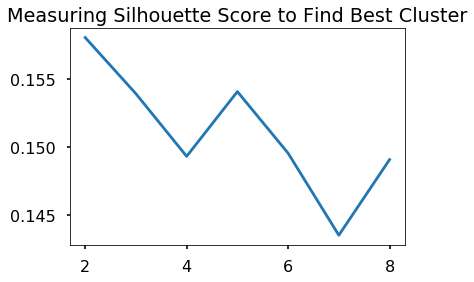

In [13]:
find_best_cluster(pf_scaled,2,9)

In [35]:
#5 clusters seem like to be a good split or try 2

## Picking Clustering and Modeling

In [15]:
pfk= KMeans(n_clusters=5, random_state=42)
pfk.fit(pf_scaled)
pf['pf_cluster'] = pfk.labels_
Counter(pfk.labels_)

Counter({0: 9, 2: 25, 4: 4, 1: 18, 3: 6})

In [19]:
pf[pf['pf_cluster']==1].head()

,2P,2P%,2PA,3P,3P%,3PA,AST,AST%,Age,BLK,BLK%,BPM,DBPM,DRB,DRB%,DRtg,FG,FG%,FGA,FT,FT%,FTA,G,GS,MP,OBPM,ORB,ORB%,ORtg,PER,PF,PTS,Pos,STL,STL%,TOV,TOV%,TRB,TRB%,TS%,Tm,USG%,VORP,pf_cluster
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Carmelo Anthony,6.0,0.437,13.8,3.4,0.357,9.4,2.0,6.5,33,1.0,1.8,-3.8,-1.9,7.7,17.7,109,9.4,0.404,23.2,2.9,0.767,3.8,78,78,2501.0,-1.9,1.3,2.9,104,12.7,3.9,25.0,PF,0.9,0.9,2.0,7.3,9.0,10.0,0.503,OKC,23.2,-1.1,1
Harrison Barnes,8.0,0.478,16.7,2.3,0.357,6.3,2.9,9.9,25,0.3,0.5,-2.1,-1.4,7.5,17.1,111,10.2,0.445,23.0,4.9,0.827,6.0,77,77,2634.0,-0.7,1.5,3.1,105,15.8,1.8,27.7,PF,0.9,0.9,2.2,8.1,8.9,9.9,0.539,DAL,25.2,-0.1,1
Michael Beasley,11.2,0.520,21.6,1.0,0.395,2.6,3.7,12.5,29,1.3,2.3,-1.5,-0.4,9.5,21.2,110,12.3,0.507,24.2,3.7,0.780,4.8,74,30,1653.0,-1.0,2.9,6.5,103,17.8,4.3,29.3,PF,1.1,1.1,4.3,14.0,12.4,13.9,0.556,NYK,26.9,0.2,1
Rudy Gay,8.9,0.516,17.2,1.5,0.314,4.8,3.0,9.8,31,1.6,2.6,0.3,1.0,8.8,19.5,103,10.4,0.471,22.0,4.6,0.772,6.0,57,6,1231.0,-0.7,3.1,6.8,106,18.0,4.0,26.9,PF,1.9,1.9,3.2,11.5,11.9,13.1,0.545,SAS,24.6,0.7,1
Aaron Gordon,6.7,0.497,13.4,2.9,0.336,8.8,3.5,11.7,22,1.2,1.9,0.0,0.0,9.5,21.5,109,9.6,0.434,22.2,4.0,0.698,5.8,58,57,1909.0,0.0,2.2,5.0,103,16.5,2.8,26.2,PF,1.5,1.5,2.7,10.0,11.7,13.2,0.530,ORL,24.7,1.0,1


In [20]:
# double checking my model predicting for one of my players.

kristaps = pd.DataFrame(pf.loc['Kristaps Porzingis'][:43]).T.drop(columns=['Age','G','GS','MP','Pos','Tm'])
kristaps_scaled=ss.transform(kristaps)
pfk.predict(kristaps_scaled)

array([1], dtype=int32)

In [28]:
# checks the distance from each cluster and why it got clustered to cluster 1

for i in range(0,5):
    print('dist between evan_scaled and cluster', i, ':', distance.euclidean(kristaps_scaled, pfk.cluster_centers_[i]))

dist between evan_scaled and cluster 0 : 11.310132660002528
dist between evan_scaled and cluster 1 : 6.368946010575431
dist between evan_scaled and cluster 2 : 8.688718721440832
dist between evan_scaled and cluster 3 : 10.561179532299905
dist between evan_scaled and cluster 4 : 9.030199888616274


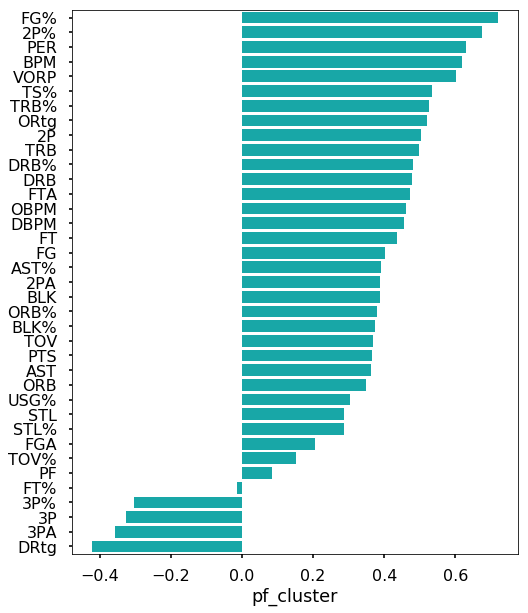

In [22]:
pf_corr = pf.drop(columns=['Age','G','GS','MP','Pos','Tm'])
corr=pf_corr.corr()
corr = corr.sort_values('pf_cluster',ascending=False)

plt.figure(figsize=(8,10))
sns.barplot(corr.pf_cluster[1:], corr.index[1:], color='c')
plt.show()

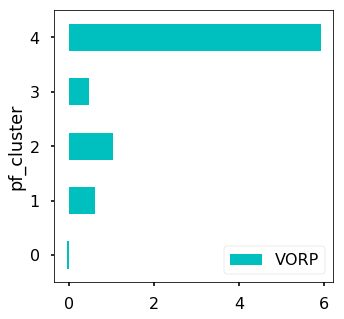

In [30]:
pf_p= pf[['VORP','pf_cluster']]
pf_p.groupby(['pf_cluster']).mean().plot(kind='barh', figsize=(5,5), color='c');

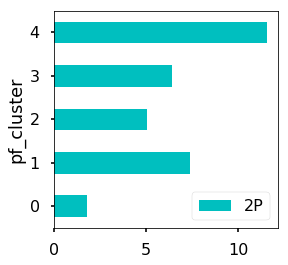

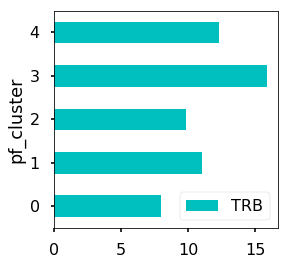

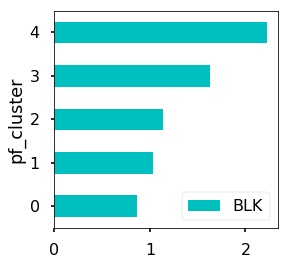

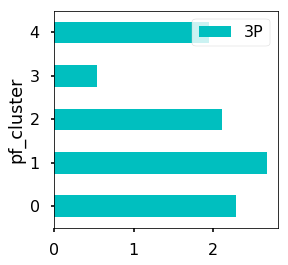

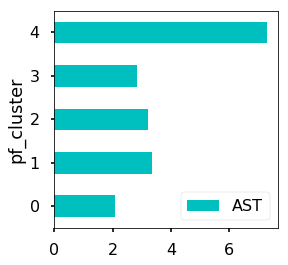

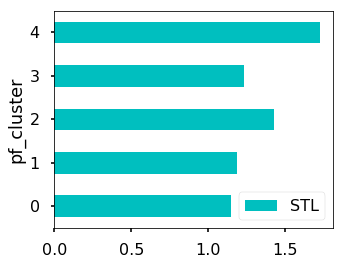

In [36]:
test1= pf[['2P','pf_cluster']]
test1.groupby(['pf_cluster']).mean().plot(kind='barh', figsize=(4,4),color='c');

test2= pf[['TRB','pf_cluster']]
test2.groupby(['pf_cluster']).mean().plot(kind='barh', figsize=(4,4),color='c');

test3= pf[['BLK','pf_cluster']]
test3.groupby(['pf_cluster']).mean().plot(kind='barh', figsize=(4,4),color='c'); # DRtg seems the same

test4= pf[['3P','pf_cluster']]
test4.groupby(['pf_cluster']).mean().plot(kind='barh', figsize=(4,4),color='c');# DRtg seems the same

test5= pf[['AST','pf_cluster']]
test5.groupby(['pf_cluster']).mean().plot(kind='barh', figsize=(4,4),color='c'); # DRtg seems the same

pf_p= pf[['STL','pf_cluster']]
pf_p.groupby(['pf_cluster']).mean().plot(kind='barh', figsize=(5,4),color='c');

## Conclusion
PF0 low usage don't do much, shoot 3's, with very low defensive Skill
<br/> Stretch 4's No D - Jared Dudley, Dragan Bender, Quincy Acy, Pattrick Patterson

PF1 makes most 3's, Average Defense Skills
<br/> Stretch 4's Some D - Nikola Mirotic, Aaron Gordon, Rudy Gay, Tobias Harris

PF2 Blking 3p shooters hybrid, High STL
<br/> Stretch 4's Better D(Stl) - Draymond Green, Serge Ibaka, Markieff Morris, Pascal Siakam

PF3 gets most rebounds, most PF, don't shoot 3's, high BLK
<br/> Tradition PF -Trevor Booker, John Collins, JaMychal Green, Noah Vonleh

PF4 Definitely the most VORP, high Per, 2P, High BLK, High AST, OPBM
<br/> FREAKS - Giannis Antetokounmpo, Anthony Davis, Kevin Durant(listed as Pf), Lebron James

Value
<br/> PF4>PF2>PF1>PF3>PF0

In [47]:
trace1 = go.Scatter3d(
    x=pf['2P'],
    y=pf['STL'],
    z=pf['AST'],
    mode='markers',
    marker=dict(
        size=12,
        color=pf['pf_cluster'],                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)
data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-scatter-colorscale')

In [38]:
# for pickle
#from sklearn.externals import joblib

#joblib.dump(ss, './pf_scaler.pk1')

#joblib.dump(pfk, './pf_kmeans.pk1')

In [48]:
pf.to_csv('./pf_cluster_17_18')